In [7]:
import cv2
import matplotlib.pyplot as plt
from gaze_tracking import GazeTracking,Eye,Pupil,Calibration
import numpy as np

In [8]:
%store -r landmarks
%store -r frame
%store -r points

In [9]:
calib=Calibration()
eye=Eye(frame, landmarks, 0, calib)

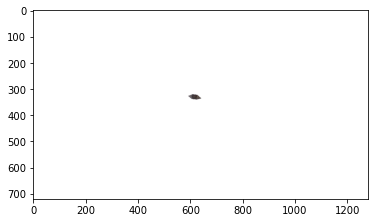

In [ ]:
plt.imshow(eye)

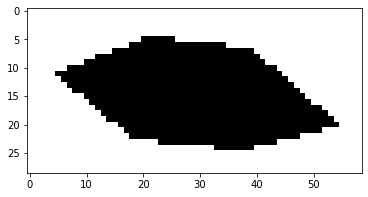

In [16]:
#####################################  ORIGINAL CODE #######################################
region = np.array([(landmarks.part(point).x, landmarks.part(point).y) for point in points])
region = region.astype(np.int32)

height, width = frame.shape[:2]
black_frame = np.zeros((height, width), np.uint8)


mask = np.full((height, width), 255, np.uint8)
cv2.fillPoly(mask, [region], (0, 0, 0))
eye = cv2.bitwise_not(black_frame, frame.copy(), mask=mask)

        # Cropping on the eye
margin = 5
min_x = np.min(region[:, 0]) - margin
max_x = np.max(region[:, 0]) + margin
min_y = np.min(region[:, 1]) - margin
max_y = np.max(region[:, 1]) + margin

new_frame = eye[min_y:max_y, min_x:max_x]

plt.imshow(new_frame, cmap='gray')

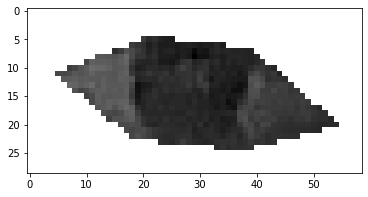

In [18]:
############################### CHANGED CODE ###################################################
region = np.array([(landmarks.part(point).x, landmarks.part(point).y) for point in points])
region = region.astype(np.int32)

height, width,channels = frame.shape[:]  ### CHANGED
black_frame = np.zeros((height, width,channels), np.uint8) ##### CHANGED

mask = np.full((height, width), 255, np.uint8)
cv2.fillPoly(mask, [region], (0, 0, 0))
f=frame.copy()
eye = cv2.bitwise_not(black_frame, f, mask=mask)

        # Cropping on the eye
margin = 5
min_x = np.min(region[:, 0]) - margin
max_x = np.max(region[:, 0]) + margin
min_y = np.min(region[:, 1]) - margin
max_y = np.max(region[:, 1]) + margin

new_frame = cv2.cvtColor(eye[min_y:max_y, min_x:max_x],cv2.COLOR_BGR2GRAY)  #### CHANGED

plt.imshow(new_frame, cmap='gray')
